In [1]:
# =======================================
# Step 1: Import libraries
# =======================================
import pandas as pd
import re
from google.colab import files

# =======================================
# Step 2: Load datasets (upload manually)
# =======================================
# Upload files interactively
print("📂 Please upload train and test CSV files:")
uploaded = files.upload()

# Replace with your actual file names after upload
train_df = pd.read_csv("/content/Corona_NLP_train.csv", encoding="latin1")
test_df  = pd.read_csv("/content/Corona_NLP_test.csv", encoding="latin1")

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

# View sample
train_df.head()

# =======================================
# Step 3: Define stopwords (offline)
# =======================================
stop_words = {
    'i','me','my','myself','we','our','ours','ourselves','you','your','yours',
    'yourself','yourselves','he','him','his','himself','she','her','hers',
    'herself','it','its','itself','they','them','their','theirs','themselves',
    'what','which','who','whom','this','that','these','those','am','is','are',
    'was','were','be','been','being','have','has','had','having','do','does',
    'did','doing','a','an','the','and','but','if','or','because','as','until',
    'while','of','at','by','for','with','about','against','between','into',
    'through','during','before','after','above','below','to','from','up','down',
    'in','out','on','off','over','under','again','further','then','once','here',
    'there','when','where','why','how','all','any','both','each','few','more',
    'most','other','some','such','no','nor','not','only','own','same','so',
    'than','too','very','s','t','can','will','just','don','should','now'
}

# =======================================
# Step 4: Define cleaning function
# =======================================
def simple_clean(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove links
    text = re.sub(r'@\w+|\#', '', text)                 # remove mentions/hashtags
    text = re.sub(r'[^a-z\s]', ' ', text)               # keep only letters
    text = re.sub(r'\s+', ' ', text).strip()            # remove extra spaces
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# =======================================
# Step 5: Apply cleaning
# =======================================
train_df["clean_tweet"] = train_df["OriginalTweet"].apply(simple_clean)
test_df["clean_tweet"]  = test_df["OriginalTweet"].apply(simple_clean)

train_df[["OriginalTweet", "clean_tweet"]].head(10)

# =======================================
# Step 6: Encode sentiment labels
# =======================================
sentiment_map = {
    "Extremely Positive": 2,
    "Positive": 1,
    "Neutral": 0,
    "Negative": -1,
    "Extremely Negative": -2
}

train_df["sentiment_label"] = train_df["Sentiment"].map(sentiment_map)
test_df["sentiment_label"]  = test_df["Sentiment"].map(sentiment_map)

train_df[["Sentiment", "sentiment_label"]].head(10)

# =======================================
# Step 7: Drop empty cleaned tweets
# =======================================
train_df = train_df[train_df["clean_tweet"].str.strip() != ""]
test_df  = test_df[test_df["clean_tweet"].str.strip() != ""]

print("After dropping empty rows:")
print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

# =======================================
# Step 8: Save processed datasets
# =======================================
train_df.to_csv("/content/processed_train.csv", index=False)
test_df.to_csv("/content/processed_test.csv", index=False)

print("✅ Preprocessing complete. Files saved as:")
print("- /content/processed_train.csv")
print("- /content/processed_test.csv")

# Optionally download them
files.download("/content/processed_train.csv")
files.download("/content/processed_test.csv")

# =======================================
# Step 9: Quick stats
# =======================================
print("\nSentiment distribution in train:")
print(train_df["sentiment_label"].value_counts())

print("\nSentiment distribution in test:")
print(test_df["sentiment_label"].value_counts())


📂 Please upload train and test CSV files:


Saving Corona_NLP_test.csv to Corona_NLP_test (1).csv
Saving Corona_NLP_train.csv to Corona_NLP_train (1).csv
Train shape: (41157, 6)
Test shape : (3798, 6)
After dropping empty rows:
Train shape: (41123, 8)
Test shape : (3796, 8)
✅ Preprocessing complete. Files saved as:
- /content/processed_train.csv
- /content/processed_test.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Sentiment distribution in train:
sentiment_label
 1    11420
-1     9916
 0     7682
 2     6624
-2     5481
Name: count, dtype: int64

Sentiment distribution in test:
sentiment_label
-1    1041
 1     947
 0     617
 2     599
-2     592
Name: count, dtype: int64


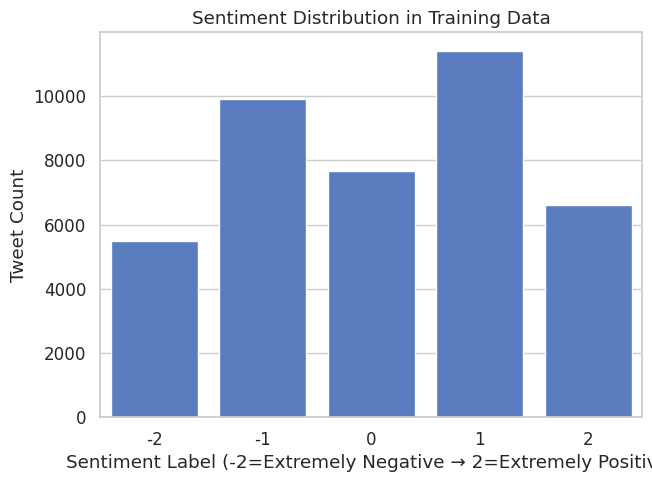

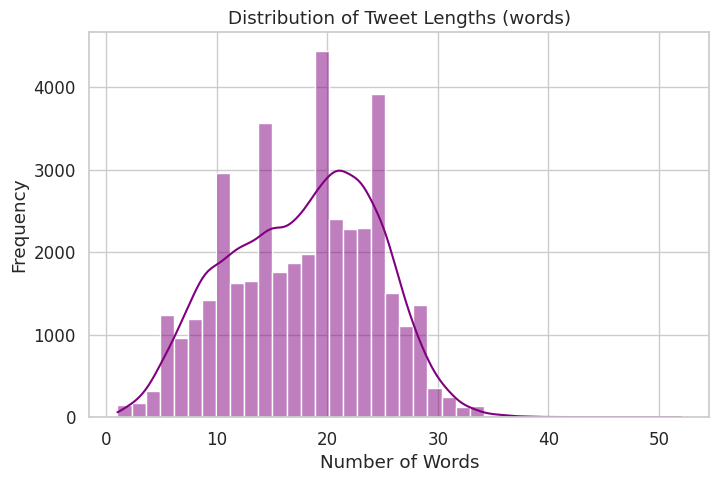

/tmp/ipython-input-1655399309.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment_label", y="tweet_length", data=train_df, palette="Set2")


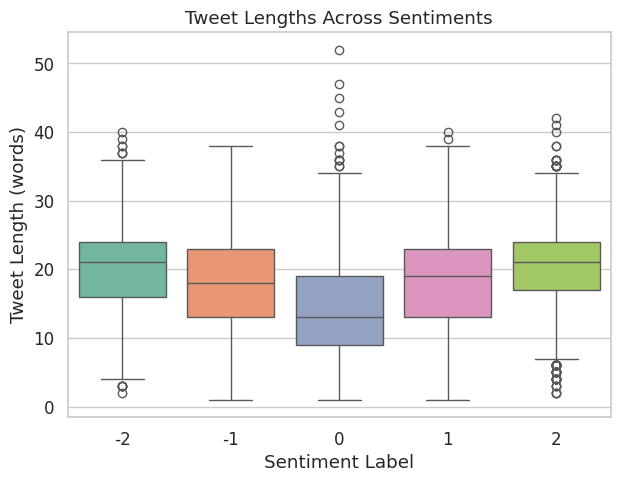

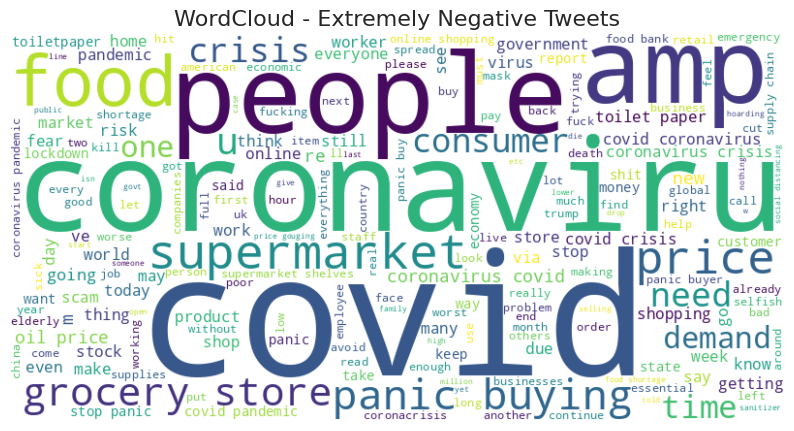

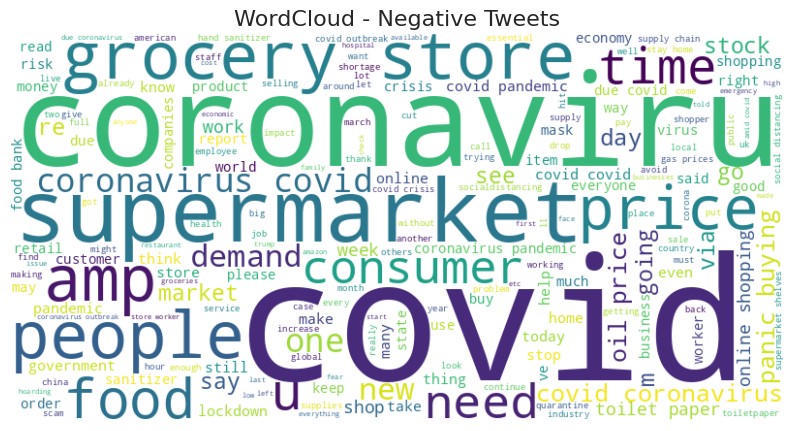

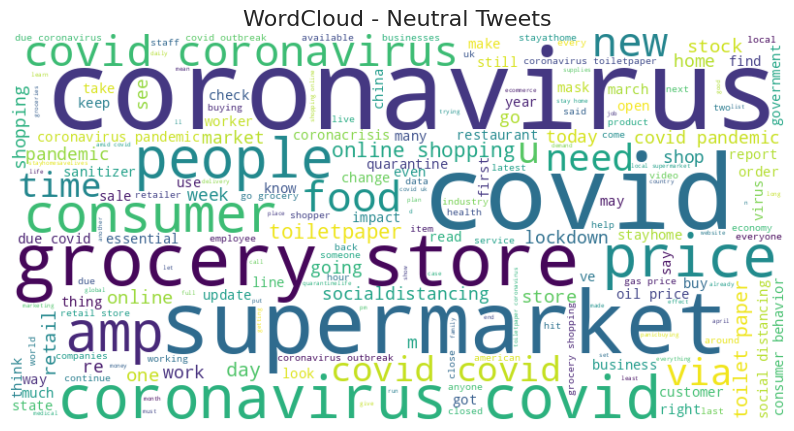

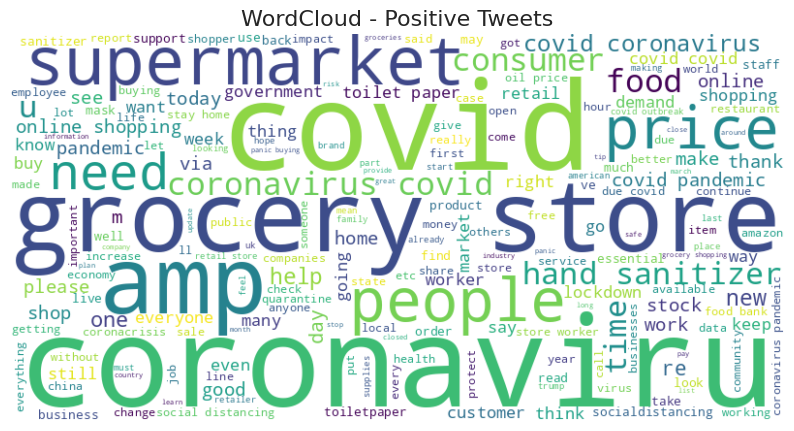

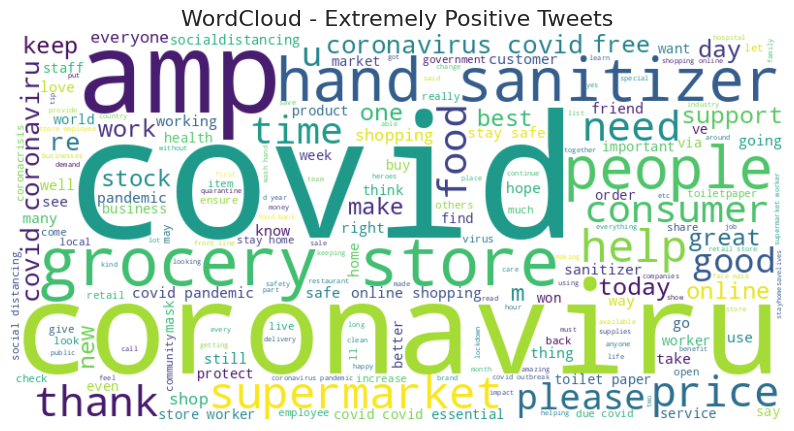

/tmp/ipython-input-1655399309.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Word", x="Count", data=common_words, palette="viridis")


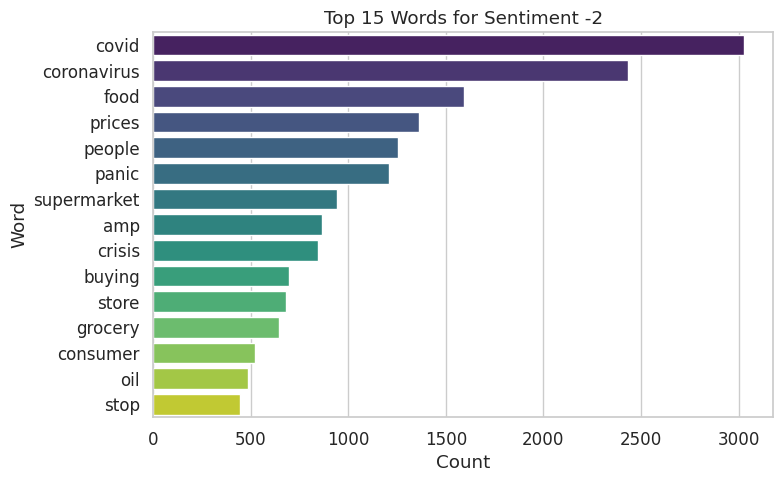

/tmp/ipython-input-1655399309.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Word", x="Count", data=common_words, palette="viridis")


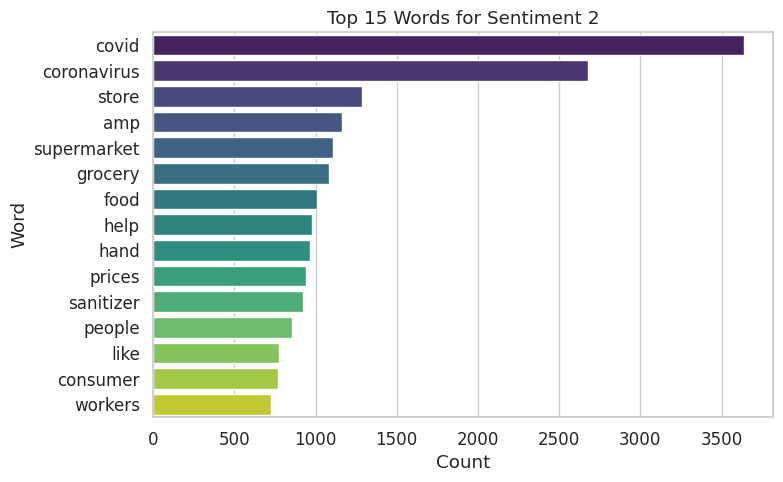

In [2]:
# =======================================
# Step 1: Import libraries for EDA
# =======================================
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# =======================================
# Step 2: Sentiment distribution
# =======================================
plt.figure(figsize=(7,5))
sns.countplot(x="sentiment_label", data=train_df,
              order=sorted(train_df["sentiment_label"].unique()))
plt.title("Sentiment Distribution in Training Data")
plt.xlabel("Sentiment Label (-2=Extremely Negative → 2=Extremely Positive)")
plt.ylabel("Tweet Count")
plt.show()

# =======================================
# Step 3: Tweet length distribution
# =======================================
train_df["tweet_length"] = train_df["clean_tweet"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(train_df["tweet_length"], bins=40, kde=True, color="purple")
plt.title("Distribution of Tweet Lengths (words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# =======================================
# Step 4: Average tweet length by sentiment
# =======================================
plt.figure(figsize=(7,5))
sns.boxplot(x="sentiment_label", y="tweet_length", data=train_df, palette="Set2")
plt.title("Tweet Lengths Across Sentiments")
plt.xlabel("Sentiment Label")
plt.ylabel("Tweet Length (words)")
plt.show()

# =======================================
# Step 5: Wordclouds for each sentiment
# =======================================
def plot_wordcloud(sentiment_value, title):
    text = " ".join(train_df[train_df["sentiment_label"]==sentiment_value]["clean_tweet"].dropna())
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

plot_wordcloud(-2, "WordCloud - Extremely Negative Tweets")
plot_wordcloud(-1, "WordCloud - Negative Tweets")
plot_wordcloud(0,  "WordCloud - Neutral Tweets")
plot_wordcloud(1,  "WordCloud - Positive Tweets")
plot_wordcloud(2,  "WordCloud - Extremely Positive Tweets")

# =======================================
# Step 6: Top frequent words (unigrams)
# =======================================
from collections import Counter

def plot_top_words(df, sentiment_value, n=15):
    words = " ".join(df[df["sentiment_label"]==sentiment_value]["clean_tweet"]).split()
    counter = Counter(words)
    common_words = pd.DataFrame(counter.most_common(n), columns=["Word", "Count"])

    plt.figure(figsize=(8,5))
    sns.barplot(y="Word", x="Count", data=common_words, palette="viridis")
    plt.title(f"Top {n} Words for Sentiment {sentiment_value}")
    plt.show()

plot_top_words(train_df, -2)
plot_top_words(train_df, 2)


In [ ]:
#With multithreading Pipeline
# =======================================
# Step 1: Imports
# =======================================
import pandas as pd
import re
from concurrent.futures import ThreadPoolExecutor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# =======================================
# Step 2: Load processed data
# =======================================
train_df = pd.read_csv("/content/processed_train.csv")
test_df  = pd.read_csv("/content/processed_test.csv")

In [ ]:
# =======================================
# Step 3: Define parallel text cleaner
# (re-using the stopwords from before)
# =======================================
stop_words = set([
    'i','me','my','myself','we','our','ours','ourselves','you','your','yours',
    'yourself','yourselves','he','him','his','himself','she','her','hers',
    'herself','it','its','itself','they','them','their','theirs','themselves',
    'what','which','who','whom','this','that','these','those','am','is','are',
    'was','were','be','been','being','have','has','had','having','do','does',
    'did','doing','a','an','the','and','but','if','or','because','as','until',
    'while','of','at','by','for','with','about','against','between','into',
    'through','during','before','after','above','below','to','from','up','down',
    'in','out','on','off','over','under','again','further','then','once','here',
    'there','when','where','why','how','all','any','both','each','few','more',
    'most','other','some','such','no','nor','not','only','own','same','so',
    'than','too','very','s','t','can','will','just','don','should','now'
])

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [ ]:
# =======================================
# Step 4: Apply cleaning in parallel
# =======================================
def parallel_clean(df, column, workers=4):
    with ThreadPoolExecutor(max_workers=workers) as executor:
        cleaned = list(executor.map(clean_text, df[column].tolist()))
    return cleaned

train_df["clean_tweet"] = parallel_clean(train_df, "clean_tweet")
test_df["clean_tweet"]  = parallel_clean(test_df, "clean_tweet")

print("✅ Parallel preprocessing complete")

✅ Parallel preprocessing complete


In [ ]:
# =======================================
# Step 5: Feature extraction (TF-IDF)
# =======================================
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train = vectorizer.fit_transform(train_df["clean_tweet"])
X_test  = vectorizer.transform(test_df["clean_tweet"])

y_train = train_df["sentiment_label"]
y_test  = test_df["sentiment_label"]

In [ ]:
# =======================================
# Step 6: Train classifier
# =======================================
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# =======================================
# Step 7: Evaluate
# =======================================
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5487355110642782

Classification Report:
               precision    recall  f1-score   support

          -2       0.60      0.45      0.51       592
          -1       0.51      0.50      0.50      1041
           0       0.59      0.67      0.63       617
           1       0.49      0.61      0.54       947
           2       0.69      0.51      0.59       599

    accuracy                           0.55      3796
   macro avg       0.58      0.55      0.55      3796
weighted avg       0.56      0.55      0.55      3796



In [ ]:
# =======================================
# Step 1: Install PyTorch (latest)
# =======================================
!pip install torch --upgrade

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import re

In [ ]:
# =======================================
# Step 2: Check CUDA
# =======================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [ ]:
# =======================================
# Step 3: Load Preprocessed Dataset
# =======================================
train_df = pd.read_csv("/content/processed_train.csv")
test_df  = pd.read_csv("/content/processed_test.csv")

print("Train:", train_df.shape, " Test:", test_df.shape)

Train: (41123, 8)  Test: (3796, 8)


In [ ]:
# =======================================
# Step 4: Simple Tokenizer & Vocabulary
# =======================================
def tokenize(text):
    return re.findall(r"\b\w+\b", str(text).lower())

# Build vocabulary
word_to_idx = {"<pad>": 0, "<unk>": 1}
for text in train_df["clean_tweet"]:
    for token in tokenize(text):
        if token not in word_to_idx:
            word_to_idx[token] = len(word_to_idx)

idx_to_word = {i: w for w, i in word_to_idx.items()}
vocab_size = len(word_to_idx)
print("Vocab size:", vocab_size)

# Encode text
def encode(text, max_len=50):
    tokens = tokenize(text)
    ids = [word_to_idx.get(t, 1) for t in tokens[:max_len]]
    ids += [0] * (max_len - len(ids))
    return ids

Vocab size: 43078


In [ ]:
# =======================================
# Step 5: Dataset & Dataloader
# =======================================
class TwitterDataset(Dataset):
    def __init__(self, df, max_len=50):
        self.texts = df["clean_tweet"].tolist()
        self.labels = df["sentiment_label"].tolist()
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        ids = torch.tensor(encode(self.texts[idx], self.max_len))
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return ids, label

train_dataset = TwitterDataset(train_df)
test_dataset  = TwitterDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64)

In [ ]:
# =======================================
# Step 6: LSTM Model
# =======================================
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return out

In [ ]:
# =======================================
# Step 7: Initialize Model
# =======================================
embed_dim = 100
hidden_dim = 128
output_dim = 5   # 5 sentiment classes (-2..2)

model = SentimentLSTM(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# =======================================
# Step 8: Training
# =======================================
EPOCHS = 3
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        preds = model(X)
        # Shift labels from [-2..2] → [0..4]
        loss = criterion(preds, y + 2)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss:.4f}")


Epoch 1/3, Loss: 1014.0309
Epoch 2/3, Loss: 1013.0389
Epoch 3/3, Loss: 1013.0401


In [ ]:
# =======================================
# Step 9: Evaluation
# =======================================
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        preds = model(X)
        predicted = torch.argmax(preds, dim=1) - 2
        correct += (predicted == y).sum().item()
        total += y.size(0)

print(f"✅ Test Accuracy: {100*correct/total:.2f}%")

✅ Test Accuracy: 24.95%


In [ ]:
# ======================================
# Step 1: Imports
# ======================================
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
from collections import Counter

In [ ]:
# ======================================
# Step 2: Dataset class
# ======================================
class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        return self.texts[idx], torch.tensor(self.labels[idx], dtype=torch.long)

In [ ]:
# ======================================
# Step 3: Tokenizer + Vocab (no torchtext)
# ======================================
def tokenize(text):
    return text.lower().split()

counter = Counter()
for text in train_df["clean_tweet"]:
    counter.update(tokenize(text))

# Build vocab dict
vocab = {"<unk>": 0}
for word in counter.keys():
    vocab[word] = len(vocab)

vocab_size = len(vocab)

# Encode function
def encode(text):
    return torch.tensor([vocab.get(word, 0) for word in tokenize(text)], dtype=torch.long)

In [ ]:
# ======================================
# Step 4: Encode tweets
# ======================================
train_sequences = [encode(text) for text in train_df["clean_tweet"]]
train_labels = train_df["sentiment_label"].tolist()

# Pad sequences
train_texts = pad_sequence(train_sequences, batch_first=True)

# ======================================
# Step 5: Prepare DataLoader
# ======================================
batch_size = 64
train_dataset = TweetDataset(train_texts, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# ======================================
# Step 6: Define LSTM Model
# ======================================
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)
    def forward(self, x):
        x = self.embedding(x)
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])


In [ ]:
# ======================================
# Step 7: Training Function
# ======================================
def train_model(device, train_loader, vocab_size, embed_dim=64, hidden_dim=128, num_classes=5, epochs=3):
    model = SentimentLSTM(vocab_size, embed_dim, hidden_dim, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    start_time = time.time()
    model.train()
    for epoch in range(epochs):
        for texts, labels in train_loader:
            texts, labels = texts.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    end_time = time.time()

    return end_time - start_time

In [ ]:
# ======================================
# Fix labels (remap to start from 0)
# ======================================
# Example: if labels are [-1, 0, 1], they become [0, 1, 2]
unique_labels = sorted(set(train_df["sentiment_label"]))
label2idx = {label: idx for idx, label in enumerate(unique_labels)}

train_labels = [label2idx[label] for label in train_df["sentiment_label"]]

num_classes = len(label2idx)
print("Label mapping:", label2idx)
print("Number of classes:", num_classes)

# Update dataset with fixed labels
train_dataset = TweetDataset(train_texts, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Label mapping: {-2: 0, -1: 1, 0: 2, 1: 3, 2: 4}
Number of classes: 5


In [ ]:
# ======================================
# Step 8: Compare CPU (multithread) vs GPU (CUDA)
# ======================================
# CPU multithread
torch.set_num_threads(torch.get_num_threads())  # use all threads
cpu_device = torch.device("cpu")
cpu_time = train_model(cpu_device, train_loader, vocab_size)

# GPU CUDA
cuda_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cuda_time = train_model(cuda_device, train_loader, vocab_size)

print(f"✅ CPU (Multithread) Training Time: {cpu_time:.2f} sec")
print(f"✅ CUDA (GPU) Training Time: {cuda_time:.2f} sec")

✅ CPU (Multithread) Training Time: 121.09 sec
✅ CUDA (GPU) Training Time: 6.41 sec


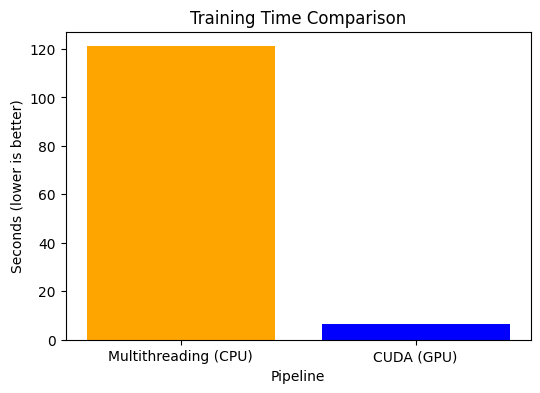

In [ ]:
import matplotlib.pyplot as plt

# ======================================
# Plot comparison
# ======================================
plt.figure(figsize=(6,4))
plt.bar(["Multithreading (CPU)", "CUDA (GPU)"], [cpu_time, cuda_time],
        color=["orange", "blue"])

plt.title("Training Time Comparison")
plt.ylabel("Seconds (lower is better)")
plt.xlabel("Pipeline")
plt.show()
